In [1]:
print(">> Installing Libraries")
!pip install pandas matplotlib numpy scikit-surprise
print(">> Libraries Installed")

>> Installing Libraries
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811601 sha256=151e4a36b29adf24af0314b6e093b6522e84dd19e0600386a68458ef7a3883e6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
>> Libraries Installed


In [5]:
print(">> Importing Libraries")
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate
print(">> Libraries imported.")


>> Importing Libraries
>> Libraries imported.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
data = files.upload ()

Saving ratings.csv to ratings.csv


In [9]:
df=pd.read_csv(io.StringIO(data['ratings.csv'].decode('utf-8')))
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [12]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [15]:
n_movies=df['movieId'].nunique()
n_users=df['userId'].nunique()
print(f'Number of unique movies: {n_movies}')
print(f'Number of unique users: {n_users}')

Number of unique movies: 9724
Number of unique users: 610


In [18]:
available_ratings=df['rating'].count()
total_ratings=n_movies*n_users
missing_ratings=total_ratings-available_ratings
sparsity=(missing_ratings/total_ratings)*100
print(f'Sparsity: {sparsity}')

Sparsity: 98.30003169443864


<Axes: >

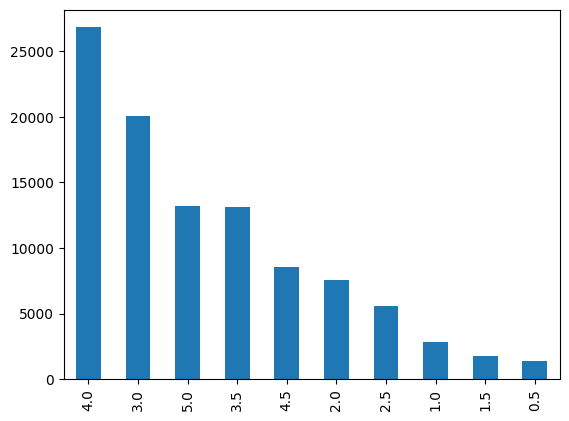

In [20]:
df['rating'].value_counts().plot(kind= 'bar')

In [21]:
filter_movies=df['movieId'].value_counts() > 3
filter_movies=filter_movies[filter_movies].index.tolist()

In [22]:
filter_users=df['userId'].value_counts() > 3
filter_users=filter_users[filter_users].index.tolist()

In [23]:
print(f'Original Shape: {df.shape}')
df=df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New shape: {df.shape}')

Original Shape: (100836, 3)
New shape: (92394, 3)


In [24]:
cols = ['userId', 'movieId', 'rating']
reader = Reader(rating_scale = (0.5 , 5))
data = Dataset.load_from_df(df[cols], reader)
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

In [27]:
!pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
algo = SVD(n_epochs = 25, verbose= True)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print('>> Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

In [31]:
predictions = algo.test(antiset)
predictions[0]
from collections import defaultdict
def get_top_n(predictions, n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
     user_ratings.sort(key = lambda x: x[1], reverse = True)
  top_n[uid] = user_ratings[:n]
  return top_n
pass

In [ ]:
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])